# PyTorch Computer Vision

## 0. Computer vision libaries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset


In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for Visualization
import matplotlib.pyplot as plt

# Check Versions
print(torch.__version__)
print(torchvision.__version__)

2.4.0
0.19.0


## 1. Get the dataset

The dataset we will be using is FashionMNIST from `torchvision.datasets`

In [2]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = True, # Do we want the training or testing dataset?
    download= True, # do we want to download yes/no?
    transform= torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform=None # how do we want to transform the test data?
)

test_data = datasets.FashionMNIST(
    root='data',
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training data
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_index = train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [8]:
# Check the shape of our image
print(f"Image Shape : {image.shape} -> [color_channels, height, width]")
print(f"Image label : {class_names[label]}")

Image Shape : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label : Ankle boot


### 1.2 Visualizing our data

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, 'ankle boot')

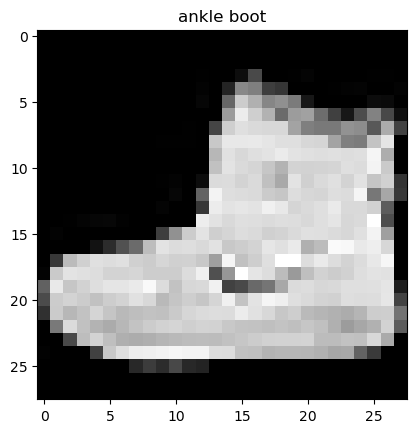

In [9]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.reshape(28,28,1),cmap = "gray")
plt.title("ankle boot")

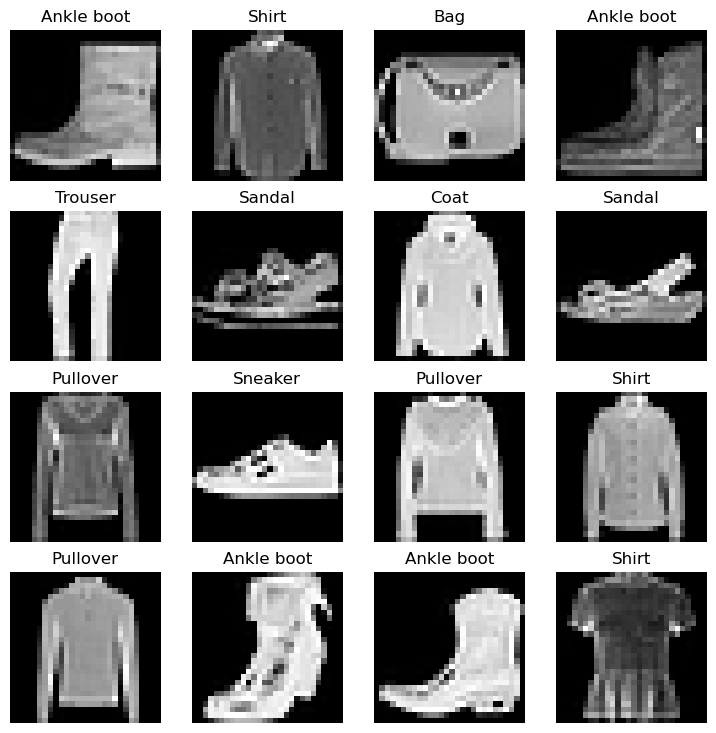

In [10]:
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4

for i in range(1, rows*cols +1):
    random_idx = torch.randint(0,len(train_data),size=(1,)).item()
    #print(random_idx)
    image,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.reshape(28,28,1),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

I think we need non-linearity in the model to fit this data.

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our dataset is in the form of PyTorch datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches(or mini-batches).

Why would we do this?

1. It is more computationally efficient. As in, your computing hardware may not be able to look (store in memory) all the 60000 images in one hit. So we break it down to 32 images at a time (batch size is 32).

2. It gives our neural network more chances to update its gradients per epoch.


In [12]:
# Turn the train dataset into dataloader

from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size= BATCH_SIZE,
                             shuffle=False)

In [13]:
# Let's check out what we created

print(f"DataLoaders : {train_dataloader, test_dataloader}")
print(f"Length of the train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x000002AE807B3FD0>, <torch.utils.data.dataloader.DataLoader object at 0x000002AE8013BCA0>)
Length of the train dataloader : 1875 batches of 32
Length of the test dataloader : 313 batches of 32


In [14]:
# Check out whats inside the training dataloader
train_features_batch, train_labels_batch  = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 6 | Label Size : torch.Size([])


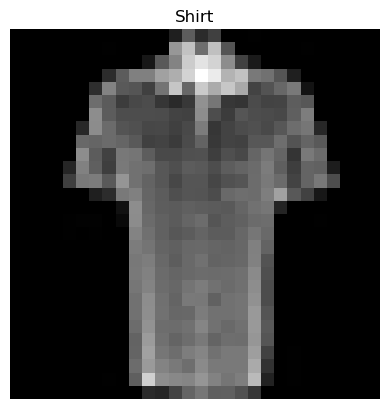

In [15]:
# Show a sample

torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label} | Label Size : {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                       out_features=hidden_units),
            nn.Linear(in_features= hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.linear_stack(x)

In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # this is 28*28, i.e. height and width of each image
                              hidden_units= 10,
                              output_shape=len(class_names)
                              ).to("cpu")

model_0

FashionMNISTModelV0(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('linear_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('linear_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('linear_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation Metric: Since we are working on a classification problem, let's use accuracy as our evaluation metric.

In [21]:
import requests
from pathlib import Path

# Download helper functions file from Learn PyTorch Repository
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    request = requests.get(url)
    with open("helper_functions.py", "wb") as f:
        f.write(request.text)

    print("helper_functions.py downloaded successfully")


helper_functions.py already exists, skipping download...


In [22]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### 3.2 Creating a function to time our experiments.

Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy)
2. Model's speed (time taken to train and generate inferences on the model)

In [23]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time

In [24]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start_time,end_time, device= "cpu")

Train time on cpu : 0.000 seconds


7.660000005671463e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out whats happening
5. Time it all (for fun)

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the manual seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
NUM_EPOCHS = 3

# Create training and testing loop
for epoch in tqdm(range(NUM_EPOCHS)):
    print(f"Epoch : {epoch}\n------")

    ### training
    train_loss = 0
    train_accuracy=0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss

        # 2.1 Calculate the accuracy (per batch)
        accuracy = accuracy_fn(y_true= y, y_pred=y_pred.argmax(dim = 1))
        train_accuracy += accuracy

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # Divide the total train accuracy by length of train dataloader
    train_accuracy /= len(train_dataloader)

    ## Testing
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss +=loss_fn(test_pred, y_test) # Accumulate test loss

            # 3. Calculate Accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test accuracy average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTraining Loss: {train_loss:.4f} | Training Accuracy: {train_accuracy:.4f}| Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

c:\Users\ac253\anaconda3\envs\ARC\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
------
Looked at 0/60000 samples.


Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:23<00:47, 23.99s/it]


Training Loss: 0.9096 | Training Accuracy: 70.8700| Test Loss: 0.6290 | Test Accuracy: 78.6342
Epoch : 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:46<00:22, 22.89s/it]


Training Loss: 0.5573 | Training Accuracy: 81.0867| Test Loss: 0.5441 | Test Accuracy: 81.1302
Epoch : 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [01:08<00:00, 22.69s/it]


Training Loss: 0.5027 | Training Accuracy: 82.7517| Test Loss: 0.5137 | Test Accuracy: 81.9988
Train time on cpu : 68.085 seconds


## 4. Make predicitions and get Model 0 results

In [26]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Calculate Loss
            test_loss = loss_fn(y_pred, y)
            loss += test_loss

            # Calculate Accuracy
            test_acc = accuracy_fn(y,y_pred.argmax(dim=1))
            acc+=test_acc

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works if the model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:02<00:00, 112.43it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

# 5. Setup device agnostic code (for using a GPU if there is one)

In [27]:
!nvidia-smi

Fri Jul 26 03:20:29 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   71C    P0             24W /   80W |    5690MiB /   6144MiB |     11%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [28]:
import torch

torch.cuda.is_available()

True

In [29]:
# Setup device agnostic code
import torch

device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 5.0 Computer vision libraries in PyTorch

In [30]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for Visualization
import matplotlib.pyplot as plt

# Check Versions
print(torch.__version__)
print(torchvision.__version__)

2.4.0
0.19.0


### 5.1 Get the dataset

In [31]:
train_data = datasets.FashionMNIST(
    root = "data",
    train= True,
    download= True,
    transform= torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train= False,
    download= True,
    transform= torchvision.transforms.ToTensor(),
    target_transform=None
)

train_data.data = train_data.data.to(device)
train_data.targets = train_data.targets.to(device)
test_data.data= test_data.data.to(device)
test_data.targets= test_data.targets.to(device)

In [32]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [33]:
class_to_index = train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 5.2 Prepare DataLoader

In [34]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [35]:
# Let's check out what we created

print(f"DataLoaders : {train_dataloader, test_dataloader}")
print(f"Length of the train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x000002AE808C9D80>, <torch.utils.data.dataloader.DataLoader object at 0x000002AE8074C130>)
Length of the train dataloader : 1875 batches of 32
Length of the test dataloader : 313 batches of 32


### 5.3 Model 1: Build an improved model with device agnostic code

In [36]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape : int,
                 output_shape : int,
                 hidden_units :int = 10):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [37]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              output_shape=len(class_names),
                              hidden_units=16).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): ReLU()
    (5): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [38]:
next(model_1.parameters()).device

device(type='cuda', index=0)

#### 5.3.1 Setup loss, Optimizer and Accuracy

In [39]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print(f"helper_functions.py already exists, skipping download")
else:
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    request=requests.get(url)
    with open("helper_functions.py", "wb") as f:
        f.write(request.text)

    print("helper_functions.py downloaded successfully")

    

helper_functions.py already exists, skipping download


In [40]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.001)

#### 5.3.5 Create a function to time our experiments

In [41]:
from timeit import default_timer as timer
def print_train_time(start, end, device):
    total_time = end - start
    print(f"Train time taken on {device} is {total_time} seconds")
    return total_time

# Functionizing training and evaluation/testing loops

Let's create a function for:
* Training Loop - `train_step()`
* Testing loop - `test_step()`

In [42]:
def train_step(
        model,
        train_dataloader : torch.utils.data.DataLoader,
        loss_fn : torch.nn.Module,
        accuracy_fn,
        optimizer: torch.optim,
        device: torch.device
):
    """Performs training with model trying to learn on data loader"""
    model.to(device)
    train_loss, train_acc = 0,0
    
    # setting the model to train
    model.train()

    # Training
    for X, y in train_dataloader:
        X=X.to(device)
        y=y.to(device)
        # Forward Pass
        y_pred = model(X)

        # Calculate the loss
        loss = loss_fn(y_pred,y)
        train_loss += loss

        # Calculat the accuracy
        train_acc += accuracy_fn(y,y_pred.argmax(dim =1))

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer.step()


    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    print(f"Training Loss: {train_loss:.5f} | Training Accuracy: {train_acc:.2f}%")

In [43]:
def test_step(
        model,
        test_dataloader : torch.utils.data.DataLoader,
        loss_fn : torch.nn.Module,
        accuracy_fn,
        device: torch.device
):
    """Performs testing for the model"""
    model.to(device)
    test_loss, test_acc = 0,0

    # Testing
    test_loss, test_acc = 0,0

    # Setting the model to evaluation mode
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            
            # Forward pass
            test_pred = model(X_test)

            # Calculate the loss
            test_loss += loss_fn(test_pred, y_test)

            # Calculate the accuracy
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim =1))

        # Calculate the test loss and accuracy average per batch
        test_loss /= len(test_dataloader)    
        test_acc /= len(test_dataloader)

    # print whats happening
    print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

#### 5.3.3 Creating a training loop and training a model on batches of data

from tqdm.auto import tqdm

torch.manual_seed(42)

def training_step(
        epochs :int,
        model: FashionMNISTModelV1,
        train_dataloader : torch.utils.data.DataLoader,
        test_dataloader : torch.utils.data.DataLoader,
        loss_fn : torch.nn.Module,
        optimizer: torch.optim,
        device: torch.device,
        timing_fn
):
    start_time = timer()
    model.to(device)
    
    train_loss, train_acc = 0,0
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch} \n-----")

        # setting the model to train
        model.train()

        # Training
        for batch, (X, y) in enumerate(train_dataloader):
            X=X.to(device)
            y=y.to(device)
            # Forward Pass
            y_pred = model(X)

            # Calculate the loss
            loss = loss_fn(y_pred,y)
            train_loss += loss

            # Calculat the accuracy
            train_acc += accuracy_fn(y,y_pred.argmax(dim =1))

            # optimizer zero grad
            optimizer.zero_grad()

            # loss backward
            loss.backward()

            # optimizer step
            optimizer.step()

            if batch % 400 ==0:
                print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

        train_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader)

        # Testing
        test_loss, test_acc = 0,0

        # Setting the model to evaluation mode
        model.eval()
        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                X_test = X_test.to(device)
                y_test = y_test.to(device)
                # Forward pass
                test_pred = model(X_test)

                # Calculate the loss
                test_loss += loss_fn(test_pred, y_test)

                # Calculate the accuracy
                test_acc += accuracy_fn(y_test, test_pred.argmax(dim =1))

            # Calculate the test loss and accuracy average per batch
            test_loss /= len(test_dataloader)    
            test_acc /= len(test_dataloader)

        # print whats happening
        print(f"\nTraining Loss: {train_loss:.4f} | Training Accuracy: {train_accuracy:.4f}| Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

        end_time = timer()

        total_train_time = timing_fn(start_time, end_time, str(next(model_1.parameters()).device))

        return f"Training is complete, Total train time is {total_train_time}"


NUM_EPOCHS =3


training_fn(epochs=NUM_EPOCHS,
            model=model_1,
            train_dataloader=train_dataloader,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            timing_fn=print_train_time)

In [44]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
NUM_EPOCHS = 10

for epoch in tqdm(range(NUM_EPOCHS)):
    print(f"Epoch: {epoch}\n----")
    train_step(model=model_1,
               train_dataloader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               optimizer=optimizer,
               device=device)
    test_step(model=model_1,
               test_dataloader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    print("-------------------------")
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
----


Training Loss: 2.27685 | Training Accuracy: 11.34%


 10%|█         | 1/10 [00:15<02:23, 15.99s/it]

Test Loss: 2.23207 | Test Accuracy: 13.93%
-------------------------
Epoch: 1
----
Training Loss: 2.11003 | Training Accuracy: 19.33%


 20%|██        | 2/10 [00:32<02:09, 16.19s/it]

Test Loss: 1.94024 | Test Accuracy: 23.31%
-------------------------
Epoch: 2
----
Training Loss: 1.72656 | Training Accuracy: 34.77%


 30%|███       | 3/10 [00:49<01:55, 16.46s/it]

Test Loss: 1.51755 | Test Accuracy: 46.29%
-------------------------
Epoch: 3
----
Training Loss: 1.32977 | Training Accuracy: 56.80%


 40%|████      | 4/10 [01:05<01:39, 16.54s/it]

Test Loss: 1.17532 | Test Accuracy: 61.11%
-------------------------
Epoch: 4
----
Training Loss: 1.06196 | Training Accuracy: 64.36%


 50%|█████     | 5/10 [01:22<01:22, 16.44s/it]

Test Loss: 0.98154 | Test Accuracy: 65.51%
-------------------------
Epoch: 5
----
Training Loss: 0.91488 | Training Accuracy: 67.19%


 60%|██████    | 6/10 [01:38<01:05, 16.48s/it]

Test Loss: 0.87741 | Test Accuracy: 67.49%
-------------------------
Epoch: 6
----
Training Loss: 0.83391 | Training Accuracy: 69.30%


 70%|███████   | 7/10 [01:54<00:48, 16.27s/it]

Test Loss: 0.81730 | Test Accuracy: 69.00%
-------------------------
Epoch: 7
----
Training Loss: 0.78312 | Training Accuracy: 71.22%


 80%|████████  | 8/10 [02:11<00:33, 16.53s/it]

Test Loss: 0.77752 | Test Accuracy: 70.64%
-------------------------
Epoch: 8
----
Training Loss: 0.74555 | Training Accuracy: 72.89%


 90%|█████████ | 9/10 [02:39<00:20, 20.16s/it]

Test Loss: 0.74327 | Test Accuracy: 72.83%
-------------------------
Epoch: 9
----
Training Loss: 0.71397 | Training Accuracy: 74.42%


100%|██████████| 10/10 [03:05<00:00, 18.54s/it]

Test Loss: 0.71768 | Test Accuracy: 74.05%
-------------------------
Train time taken on cuda is 185.40348270000004 seconds


> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than on GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms in capability than the GPU.

In [45]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X=X.to(device)
            y=y.to(device)
            # Make predictions
            y_pred = model(X)

            # Calculate Loss
            test_loss = loss_fn(y_pred, y)
            loss += test_loss

            # Calculate Accuracy
            test_acc = accuracy_fn(y,y_pred.argmax(dim=1))
            acc+=test_acc

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works if the model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [46]:
# Calculate model 1 results on test dataset
model_1_results = eval_model(model = model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device= device)
model_1_results

100%|██████████| 313/313 [00:02<00:00, 115.48it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7176772952079773,
 'model_acc': 74.05151757188499}

In [47]:
# Recalculate model 0 results on test dataset
model_0_results = eval_model(model = model_0.to(device),
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device= device)
model_0_results

100%|██████████| 313/313 [00:02<00:00, 146.66it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

## Model 2: Building a Convolutional Neural Network

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [48]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """

    def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels= hidden_units,
                      kernel_size=3,
                      padding= 1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels= hidden_units,
                      kernel_size=3,
                      padding= 1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # There is a trick to calculating this
                      out_features=output_shape)
        )
        
    def forward(self,x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [49]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units= 10,
                              output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d()`

In [50]:
torch.manual_seed(42)

# Creating a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [51]:
# create a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=2,
                       padding=0)

# Pass the data through the Conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 31, 31])

### 7.2 Stepping through the `nn.MaxPool2d()`

In [52]:
test_image.shape

torch.Size([3, 64, 64])

In [53]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=4)

test_image_through_conv_layer = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv_layer.shape}")

test_image_through_conv_layer_and_max_layer = max_pool_layer(test_image_through_conv_layer)
print(f"Shape after going through conv_layer() and Max_pool_layer(): {test_image_through_conv_layer_and_max_layer.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 31, 31])
Shape after going through conv_layer() and Max_pool_layer(): torch.Size([1, 10, 7, 7])


In [54]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size = (1,1,2,2))
print(f"Random Tensor: {random_tensor}")
print(f"Random Tensor shape : {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print (f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max Pool Tensor Shape: {max_pool_tensor.shape}")

Random Tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor shape : torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max Pool Tensor Shape: torch.Size([1, 1, 1, 1])


In [55]:
image.shape

torch.Size([1, 28, 28])

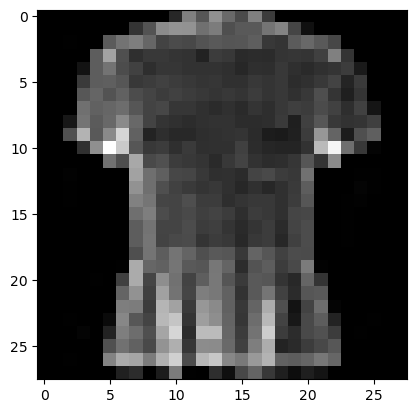

In [56]:
plt.imshow(image.squeeze(dim=0),cmap="gray")

In [57]:
rand_image_tensor = torch.rand(size=(1,28,28))

model_2(rand_image_tensor.unsqueeze(dim=0).to(device))

tensor([[ 0.0280, -0.0701,  0.0623, -0.0392, -0.0155,  0.0186,  0.0038, -0.0171,
          0.0174, -0.0007]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup a loss function and optimizer for `model_2`

In [58]:
# Setup loss function/eval metrics/optimizer

from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr= 0.01)

### 7.4 Training and Testing `model_2` using our training and test functions

In [59]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure Time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and Test model
NUM_EPOCHS = 10
for epoch in tqdm(range(NUM_EPOCHS)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model=model_2,
               train_dataloader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               optimizer=optimizer,
               device=device)
    test_step(model=model_2,
              test_dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)
print(f"\nTime taken to train model_2 for {NUM_EPOCHS} epochs is {total_train_time_model_2} seconds.")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----
Training Loss: 1.03786 | Training Accuracy: 62.34%


 10%|█         | 1/10 [00:27<04:08, 27.65s/it]

Test Loss: 0.62519 | Test Accuracy: 76.89%
Epoch: 1
-----
Training Loss: 0.54947 | Training Accuracy: 80.02%


 20%|██        | 2/10 [00:55<03:42, 27.83s/it]

Test Loss: 0.49817 | Test Accuracy: 81.54%
Epoch: 2
-----
Training Loss: 0.45566 | Training Accuracy: 83.52%


 30%|███       | 3/10 [01:24<03:18, 28.29s/it]

Test Loss: 0.44082 | Test Accuracy: 84.23%
Epoch: 3
-----
Training Loss: 0.41326 | Training Accuracy: 85.16%


 40%|████      | 4/10 [01:50<02:44, 27.38s/it]

Test Loss: 0.41263 | Test Accuracy: 85.44%
Epoch: 4
-----
Training Loss: 0.38665 | Training Accuracy: 86.17%


 50%|█████     | 5/10 [02:17<02:16, 27.27s/it]

Test Loss: 0.39886 | Test Accuracy: 86.01%
Epoch: 5
-----
Training Loss: 0.36734 | Training Accuracy: 86.87%


 60%|██████    | 6/10 [02:42<01:45, 26.36s/it]

Test Loss: 0.38412 | Test Accuracy: 86.71%
Epoch: 6
-----
Training Loss: 0.35173 | Training Accuracy: 87.43%


 70%|███████   | 7/10 [03:17<01:27, 29.18s/it]

Test Loss: 0.37942 | Test Accuracy: 86.59%
Epoch: 7
-----
Training Loss: 0.34024 | Training Accuracy: 87.80%


 80%|████████  | 8/10 [03:53<01:03, 31.56s/it]

Test Loss: 0.36002 | Test Accuracy: 87.46%
Epoch: 8
-----
Training Loss: 0.32952 | Training Accuracy: 88.28%


 90%|█████████ | 9/10 [04:31<00:33, 33.46s/it]

Test Loss: 0.35922 | Test Accuracy: 87.35%
Epoch: 9
-----
Training Loss: 0.32167 | Training Accuracy: 88.49%


100%|██████████| 10/10 [05:05<00:00, 30.57s/it]

Test Loss: 0.36526 | Test Accuracy: 87.18%
Train time taken on cuda is 305.7105421000001 seconds

Time taken to train model_2 for 10 epochs is 305.7105421000001 seconds.


In [60]:
# Get model_2 results dictionary

model_2_results = eval_model(
    model = model_2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_2_results

100%|██████████| 313/313 [00:03<00:00, 88.22it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3652637302875519,
 'model_acc': 87.18051118210863}

In [61]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

## 8. Compare model results and training time

In [62]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.513675,81.998802
1,FashionMNISTModelV1,0.717677,74.051518
2,FashionMNISTModelV2,0.365264,87.180511


In [63]:
# Add training time to results comparison
compare_results["train_time"] = [total_train_time_model_0,
                                 total_train_time_model_1,
                                 total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelV0,0.513675,81.998802,68.084835
1,FashionMNISTModelV1,0.717677,74.051518,185.403483
2,FashionMNISTModelV2,0.365264,87.180511,305.710542


Text(0, 0.5, 'model')

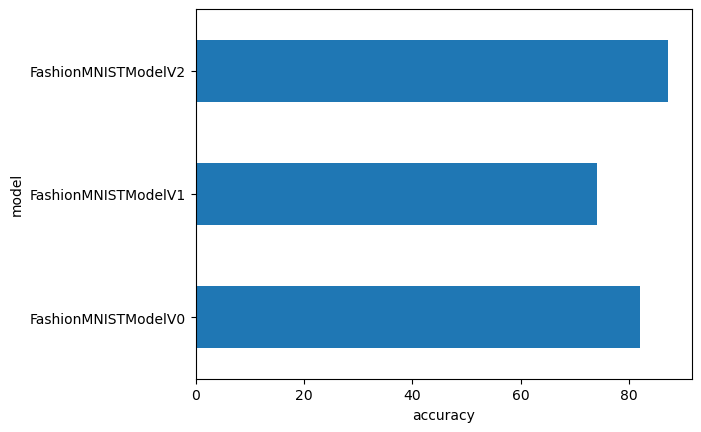

In [64]:
# Visualizing our model results

compare_results.set_index("model_name")["model_acc"].plot(kind = 'barh')
plt.xlabel("accuracy")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [65]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample,dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn the list into a tensor
    return torch.stack(pred_probs)

In [66]:
img, label = test_data[0][:10]

img.shape, label

(torch.Size([1, 28, 28]), 9)

In [67]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k= 9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

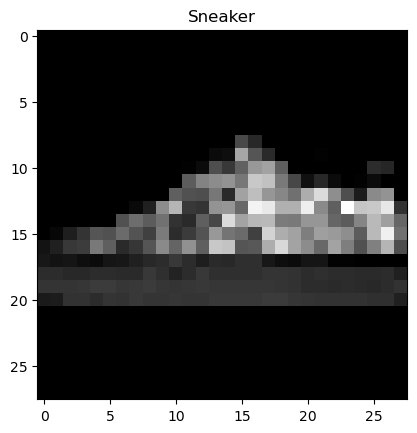

In [68]:
plt.imshow(test_samples[0].squeeze(), cmap='grey')
plt.title(class_names[test_labels[0]])

In [69]:
# Make predicitons
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.7888e-06, 3.8827e-07, 3.4979e-06, 5.6803e-06, 7.1418e-08, 2.6608e-03,
         1.0791e-06, 9.9692e-01, 1.5620e-04, 2.4905e-04],
        [8.6302e-03, 3.3509e-03, 2.6451e-04, 9.8662e-01, 3.3982e-04, 8.5294e-06,
         4.5124e-04, 1.7005e-05, 3.0107e-04, 1.2172e-05]])

In [70]:
test_labels # The actual labels for the samples

[7, 3, 3, 4, 4, 3, 1, 0, 0]

In [71]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim =1)
pred_classes

tensor([7, 3, 3, 2, 4, 0, 1, 0, 0])

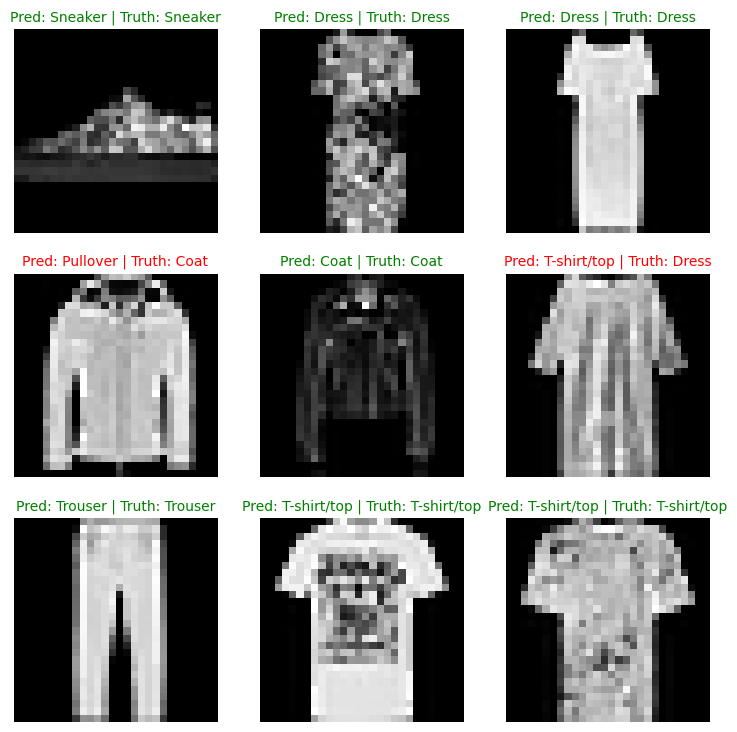

In [72]:
# Plot Predictions

plt.figure(figsize = (9,9))
nrows=3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows,ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find the prediction (in text form)
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change the color of the title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # Green text if prediction is same as the truth
    else:
        plt.title(title_text, fontsize=10, c='r') # Red text if prediction is not same as the truth

    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluationg your classification models visually.

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [73]:
# import tqdm
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(device),y.to(device)
        #print(y[:5])

        # Do the forward pass
        y_logit = model_2(X)

        # Turn our predictions form logits -> prediction probabilities -> prediciton labels
        y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)

        # put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|██████████| 313/313 [00:03<00:00, 96.68it/s] 


tensor([9, 2, 1,  ..., 0, 3, 7])

In [74]:
len(y_pred_tensor)

10000

#### See if required  packages are installed and if not, install them....

In [75]:
try:
    import mlxtend, torchmetrics
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


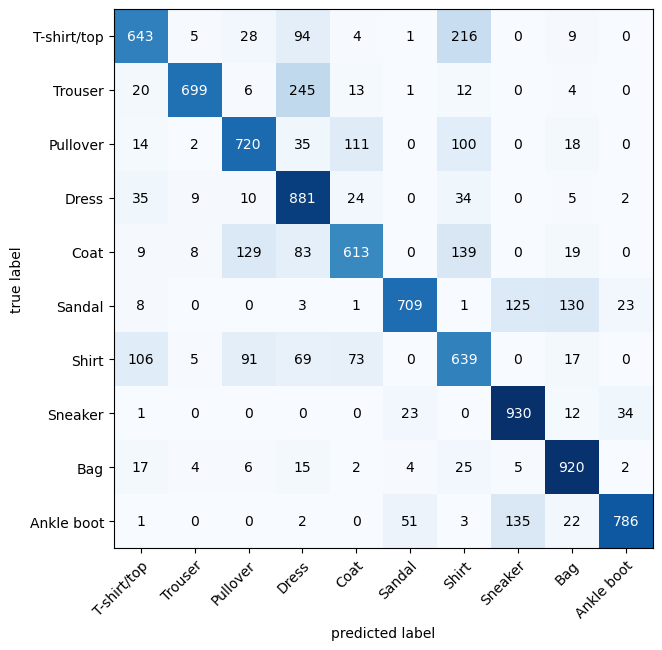

In [76]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes = len(class_names))

confmat_tensor = confmat(preds= y_pred_tensor,
                         target = test_data.targets)

# 3. Plot our Confusion Matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load the model

In [77]:
from pathlib import Path

# Create a directory to save our model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok=True, parents=True)

# model name
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"

# model path
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dictionary
torch.save(obj = model_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [78]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                        hidden_units=10,
                                        output_shape=len(class_names)).to(device)

# Load the model state dictionary
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

C:\Users\ac253\AppData\Local\Temp\ipykernel_32584\315592423.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [79]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3652637302875519,
 'model_acc': 87.18051118210863}

In [80]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)

loaded_model_2_results

100%|██████████| 313/313 [00:03<00:00, 83.93it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3652637302875519,
 'model_acc': 87.18051118210863}

In [81]:
# Check if the loaded model results are the same as the original model results

torch.isclose(torch.tensor(model_2_results["model_loss"]),
                torch.tensor(loaded_model_2_results["model_loss"]),
                atol=1e-02)

tensor(True)

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [82]:
# Check for GPU
!nvidia-smi

Fri Jul 26 03:29:28 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   69C    P0             36W /   80W |    5833MiB /   6144MiB |     18%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [83]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.4.0


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [84]:
import torch
from torchvision import transforms

In [85]:
import torchvision
from torchvision import datasets


train_data = datasets.MNIST(
    root= "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root= "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)

In [86]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

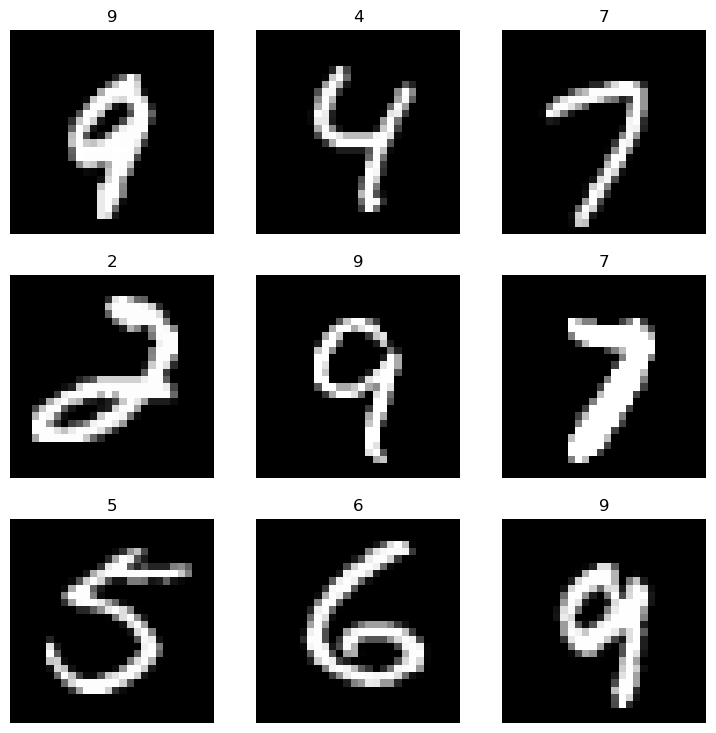

In [87]:
import matplotlib.pyplot as plt
import random
random.seed(42)

nrows,ncols = 3,3
plt.figure(figsize=(9,9))
for i, (image, label) in enumerate(random.sample(list(train_data), k = 9)):
    plt.subplot(nrows,ncols, i+1)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [88]:
import torch.utils


train_dataloader = torch.utils.data.DataLoader(
    dataset=train_data,
    batch_size = 32,
    shuffle = True
)

test_dataloader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = False
)

In [89]:
print(f"Train Dataloader: {train_dataloader}")
print(f"Length of the Train Dataloader: {len(train_dataloader)}")

Train Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x000002AE8093B7F0>
Length of the Train Dataloader: 1875


In [90]:
print(f"Test Dataloader: {test_dataloader}")
print(f"Length of the Test Dataloader: {len(test_dataloader)}")

Test Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x000002AE803A3340>
Length of the Test Dataloader: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [91]:
from torch import nn

class MNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units= 10, output_shape=10):
        super().__init__()
        self.conv_stack_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
                ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
                ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2
                )
        )
        self.conv_stack_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
                ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
                ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2
                )
        )
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=490,
                out_features=output_shape,
                )
        )

    def forward(self,x):
        x = self.conv_stack_1(x)
        x = self.conv_stack_2(x)
        x = self.linear_stack(x)
        return x

In [92]:
model_3_cpu = MNISTModelV0(input_shape=1,
                       hidden_units= 10,
                       output_shape=10).to(device)
model_3_cpu

MNISTModelV0(
  (conv_stack_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_stack_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [93]:
model_3_gpu = MNISTModelV0(input_shape=1,
                       hidden_units= 10,
                       output_shape=10).to(device)
model_3_gpu

MNISTModelV0(
  (conv_stack_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_stack_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [94]:
from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss()

optimizer_cpu = torch.optim.SGD(lr=0.01,
                            params= model_3_cpu.parameters())

optimizer_gpu = torch.optim.SGD(lr=0.01,
                            params= model_3_gpu.parameters())

In [95]:
device

'cuda'

In [96]:
from tqdm.auto import tqdm
NUM_EPOCHS = 5
device = "cpu"
print(device)

for epoch in tqdm(range(NUM_EPOCHS)):
    print(f"Epoch: {epoch}")
    model_3_cpu.to(device)
    train_loss, train_acc = 0,0

    # Training
    model_3_cpu.train()

    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)

        # Forward Pass
        y_train_logits = model_3_cpu(X)
        y_train_labels = torch.softmax(y_train_logits, dim=0).argmax(dim=1)

        # Caluculate the loss
        loss = loss_fn(y_train_logits, y)
        train_loss += loss

        # Calculate the accuracy
        acc = accuracy_fn(y,y_train_labels)
        train_acc +=acc

        # optimize zero grad
        optimizer_cpu.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer_cpu.step()

        if batch % 300 == 0:
            print(f"Looked at {batch}/{len(train_dataloader)} batches in train data.")

    train_loss /= len(train_dataloader)

    train_acc /= len(train_dataloader)

    #testing
    model_3_cpu.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            X_test,y_test = X_test.to(device),y_test.to(device)
            y_test_logits = model_3_cpu(X_test)
            y_test_labels = torch.softmax(y_test_logits, dim=0).argmax(dim = 1)

            loss = loss_fn(y_test_logits,y_test)
            test_loss += loss
            
            acc = accuracy_fn(y_test,y_test_labels)
            test_acc += acc

            if batch % 300 == 0:
                print(f"Looked at {batch}/{len(test_dataloader)} batches in test data.")

        test_acc /= len(test_dataloader)

        test_loss /= len(test_dataloader)

    print(f"Epoch: {epoch} \nTraining Loss: {train_loss} | Training Accuracy: {train_acc} | Testing Loss: {test_loss} | Testing Accuracy: {test_acc}")

cpu


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.
Looked at 300/313 batches in test data.


 20%|██        | 1/5 [01:40<06:42, 100.58s/it]

Epoch: 0 
Training Loss: 2.3010714054107666 | Training Accuracy: 16.07 | Testing Loss: 2.2973439693450928 | Testing Accuracy: 36.41174121405751
Epoch: 1
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.
Looked at 300/313 batches in test data.


 40%|████      | 2/5 [02:54<04:13, 84.61s/it] 

Epoch: 1 
Training Loss: 0.8914855718612671 | Training Accuracy: 67.595 | Testing Loss: 0.17619232833385468 | Testing Accuracy: 82.30830670926518
Epoch: 2
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.
Looked at 300/313 batches in test data.


 60%|██████    | 3/5 [04:06<02:37, 78.91s/it]

Epoch: 2 
Training Loss: 0.15131348371505737 | Training Accuracy: 78.69666666666667 | Testing Loss: 0.13304932415485382 | Testing Accuracy: 84.3650159744409
Epoch: 3
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.


 80%|████████  | 4/5 [05:16<01:15, 75.61s/it]

Looked at 300/313 batches in test data.
Epoch: 3 
Training Loss: 0.10890750586986542 | Training Accuracy: 80.46666666666667 | Testing Loss: 0.08439434319734573 | Testing Accuracy: 86.12220447284345
Epoch: 4
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.
Looked at 300/313 batches in test data.


100%|██████████| 5/5 [06:29<00:00, 77.91s/it]

Epoch: 4 
Training Loss: 0.0898178368806839 | Training Accuracy: 81.62333333333333 | Testing Loss: 0.06985261291265488 | Testing Accuracy: 86.50159744408946


In [97]:
from tqdm.auto import tqdm
NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

for epoch in tqdm(range(NUM_EPOCHS)):
    print(f"Epoch: {epoch}")
    model_3_gpu.to(device)
    train_loss, train_acc = 0,0

    # Training
    model_3_gpu.train()

    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)

        # Forward Pass
        y_train_logits = model_3_gpu(X)
        y_train_labels = torch.softmax(y_train_logits, dim=0).argmax(dim=1)

        # Caluculate the loss
        loss = loss_fn(y_train_logits, y)
        train_loss += loss

        # Calculate the accuracy
        acc = accuracy_fn(y,y_train_labels)
        train_acc +=acc

        # optimize zero grad
        optimizer_gpu.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer_gpu.step()

        if batch % 300 == 0:
            print(f"Looked at {batch}/{len(train_dataloader)} batches in train data.")

    train_loss /= len(train_dataloader)

    train_acc /= len(train_dataloader)

    #testing
    model_3_gpu.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            X_test,y_test = X_test.to(device),y_test.to(device)
            y_test_logits = model_3_gpu(X_test)
            y_test_labels = torch.softmax(y_test_logits, dim=0).argmax(dim = 1)

            loss = loss_fn(y_test_logits,y_test)
            test_loss += loss
            
            acc = accuracy_fn(y_test,y_test_labels)
            test_acc += acc

            if batch % 300 == 0:
                print(f"Looked at {batch}/{len(test_dataloader)} batches in test data.")

        test_acc /= len(test_dataloader)

        test_loss /= len(test_dataloader)

    print(f"Epoch: {epoch} \nTraining Loss: {train_loss} | Training Accuracy: {train_acc} | Testing Loss: {test_loss} | Testing Accuracy: {test_acc}")

cuda


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.


 20%|██        | 1/5 [00:51<03:27, 51.78s/it]

Looked at 300/313 batches in test data.
Epoch: 0 
Training Loss: 2.0222973823547363 | Training Accuracy: 43.17 | Testing Loss: 0.4378678500652313 | Testing Accuracy: 78.83386581469648
Epoch: 1
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.
Looked at 300/313 batches in test data.


 40%|████      | 2/5 [01:44<02:36, 52.31s/it]

Epoch: 1 
Training Loss: 0.19910584390163422 | Training Accuracy: 79.44666666666667 | Testing Loss: 0.11139393597841263 | Testing Accuracy: 86.82108626198082
Epoch: 2
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.


 60%|██████    | 3/5 [02:44<01:51, 55.67s/it]

Looked at 300/313 batches in test data.
Epoch: 2 
Training Loss: 0.10490378737449646 | Training Accuracy: 82.94 | Testing Loss: 0.08310848474502563 | Testing Accuracy: 87.77955271565496
Epoch: 3
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.


 80%|████████  | 4/5 [03:32<00:52, 52.69s/it]

Looked at 300/313 batches in test data.
Epoch: 3 
Training Loss: 0.08447691053152084 | Training Accuracy: 84.23666666666666 | Testing Loss: 0.06746795028448105 | Testing Accuracy: 88.0591054313099
Epoch: 4
Looked at 0/1875 batches in train data.
Looked at 300/1875 batches in train data.
Looked at 600/1875 batches in train data.
Looked at 900/1875 batches in train data.
Looked at 1200/1875 batches in train data.
Looked at 1500/1875 batches in train data.
Looked at 1800/1875 batches in train data.
Looked at 0/313 batches in test data.


100%|██████████| 5/5 [04:02<00:00, 48.58s/it]

Looked at 300/313 batches in test data.
Epoch: 4 
Training Loss: 0.07431363314390182 | Training Accuracy: 84.54166666666667 | Testing Loss: 0.06762518733739853 | Testing Accuracy: 88.9476837060703


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [98]:
img, label = test_data[0][:10]

img.shape, label

(torch.Size([1, 28, 28]), 7)

In [99]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k =9):
    test_samples.append(sample)
    test_labels.append(label)


# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '2 - two')

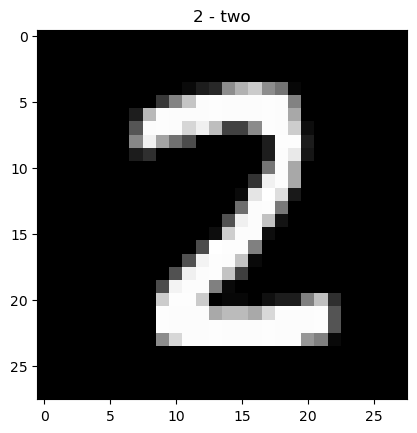

In [100]:
class_names = test_data.classes

plt.imshow(test_samples[0].squeeze(), cmap='grey')
plt.title(class_names[test_labels[0]])

In [101]:
# Make predictions
pred_probs = make_predictions(model=model_3_gpu,
                              data = test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[2.2654e-09, 1.7664e-07, 1.0000e+00, 1.0870e-07, 5.1693e-17, 1.3052e-12,
         5.9761e-13, 1.0610e-07, 1.2819e-07, 5.1794e-11],
        [1.1817e-07, 9.9020e-01, 2.2688e-05, 1.5979e-04, 3.0617e-05, 6.7841e-04,
         9.9060e-04, 5.0653e-04, 7.1177e-03, 2.9445e-04]])

In [102]:
print(test_labels)

pred_classes = pred_probs.argmax(dim = 1)
pred_classes

[2, 1, 2, 4, 6, 6, 4, 9, 1]


tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

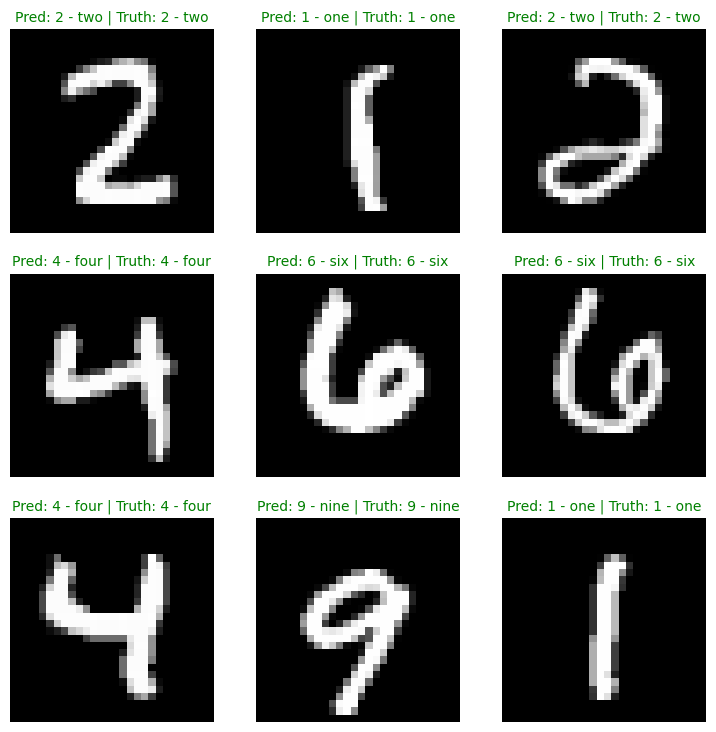

In [103]:
# Plot Predictions

plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # plot the target image
    plt.imshow(sample.squeeze(), cmap = 'grey')

    # Find the prediction (in text form)
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change the color of the title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c = 'g')
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [104]:
# import tqdm
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_3_gpu.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = "Making predictions...."):
        # Send the data and targets to target device
        X,y = X.to(device), y.to(device)

        # Do the forward pass
        y_logit = model_3_gpu(X)

        # Turn our predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)

        # put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions....: 100%|██████████| 313/313 [00:02<00:00, 119.38it/s]


tensor([7, 2, 1,  ..., 4, 5, 6])

In [105]:
len(y_pred_tensor)

10000

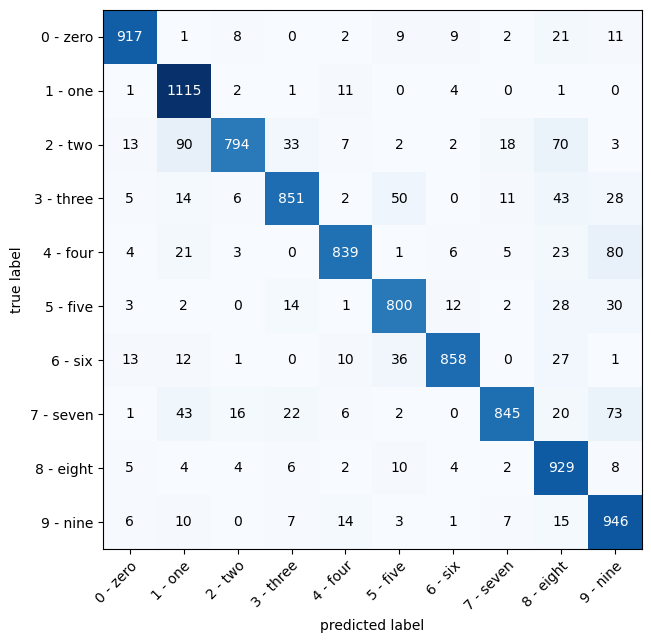

In [106]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup Confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task = "multiclass", num_classes=len(class_names))

confmat_tensor = confmat(preds= y_pred_tensor,
                         target = test_data.targets)

# 3. Plot our Confusion Matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [107]:
torch.manual_seed(42)

# Creating a batch of images
images = torch.randn(size=(1,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n {test_image}")

Image batch shape: torch.Size([1, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [108]:
# Create a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels= 10,
                       kernel_size= (3,3),
                       stride = 2,
                       padding = 0)


# Pass the data through the Conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 31, 31])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?